In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings

import geopandas as gpd
import folium
import mapclassify

In [108]:
df = pd.read_csv(r'C:\python\airlines\airlines_flights_data.csv')
df.head(2)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [109]:
df.drop(columns = ['index'], inplace = True)
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [110]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [111]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [112]:
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


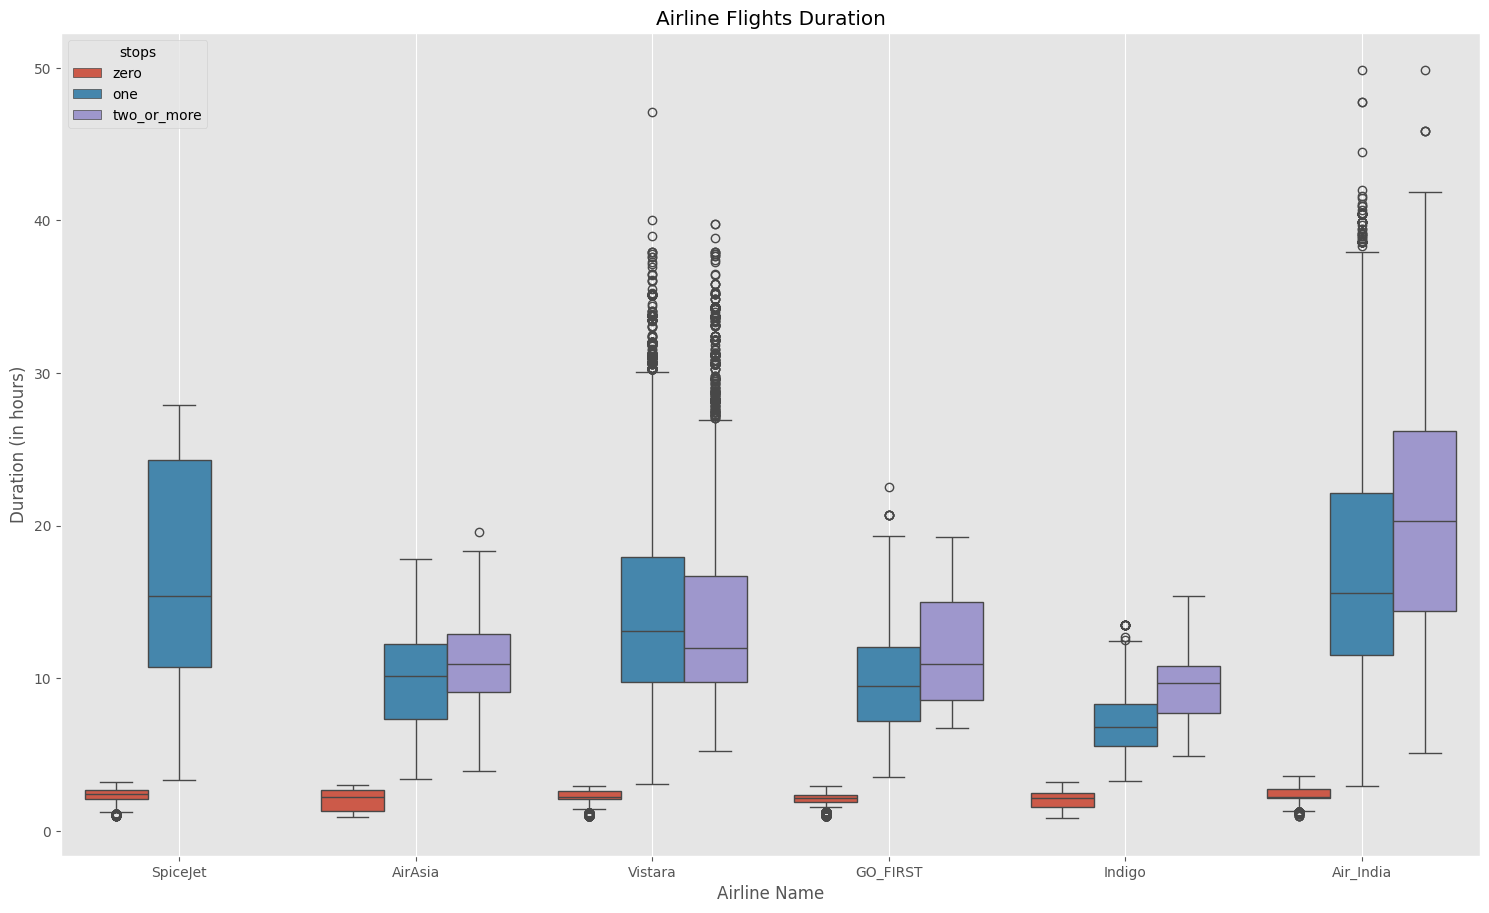

In [113]:
plt.figure(figsize = (15, 9))
plt.style.use('ggplot')
sns.boxplot(data = df, x = 'airline',  y = 'duration', hue = 'stops')
plt.tight_layout()
plt.xlabel('Airline Name')
plt.grid(axis = 'both')
plt.ylabel('Duration (in hours)')
plt.title('Airline Flights Duration')
plt.show()


Usually non-stop flights have lower duration, that means flights with one ore more stops or transitions have more duration to go from one city to another

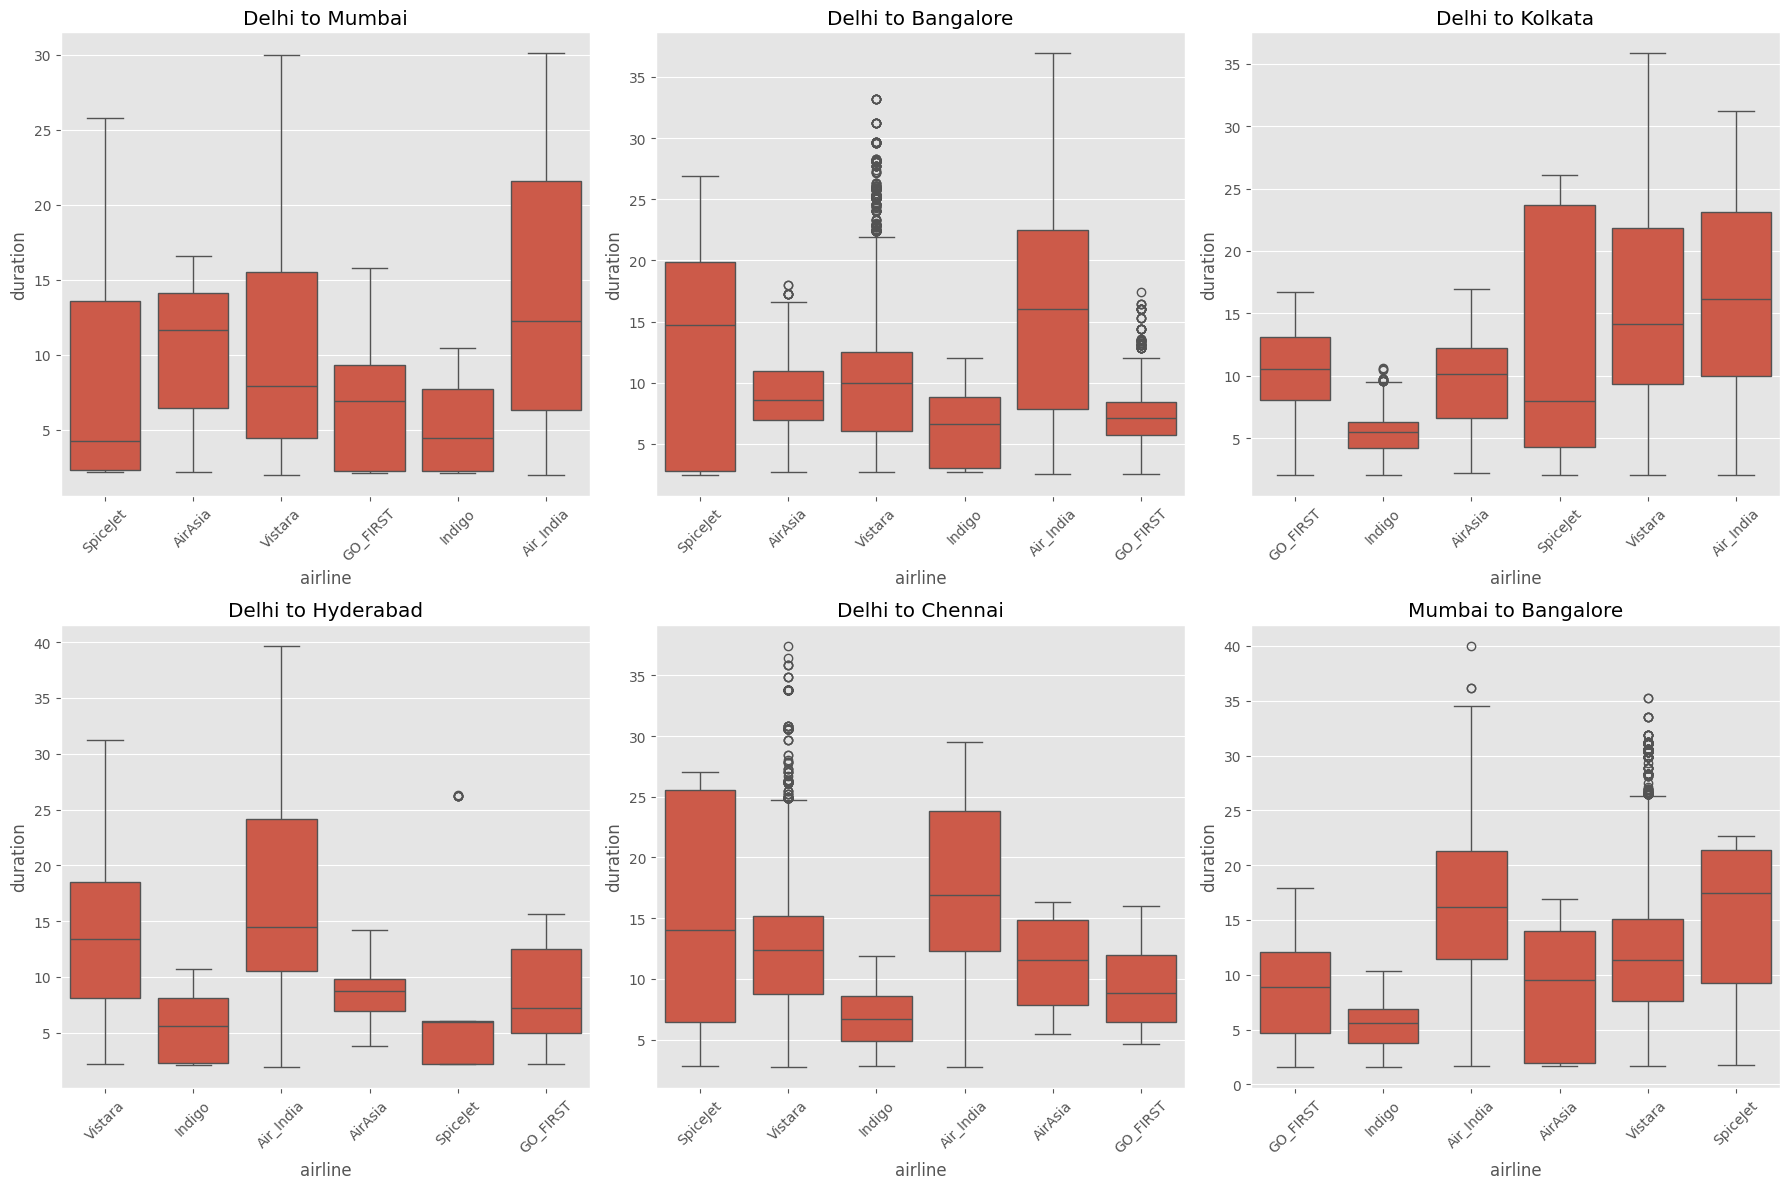

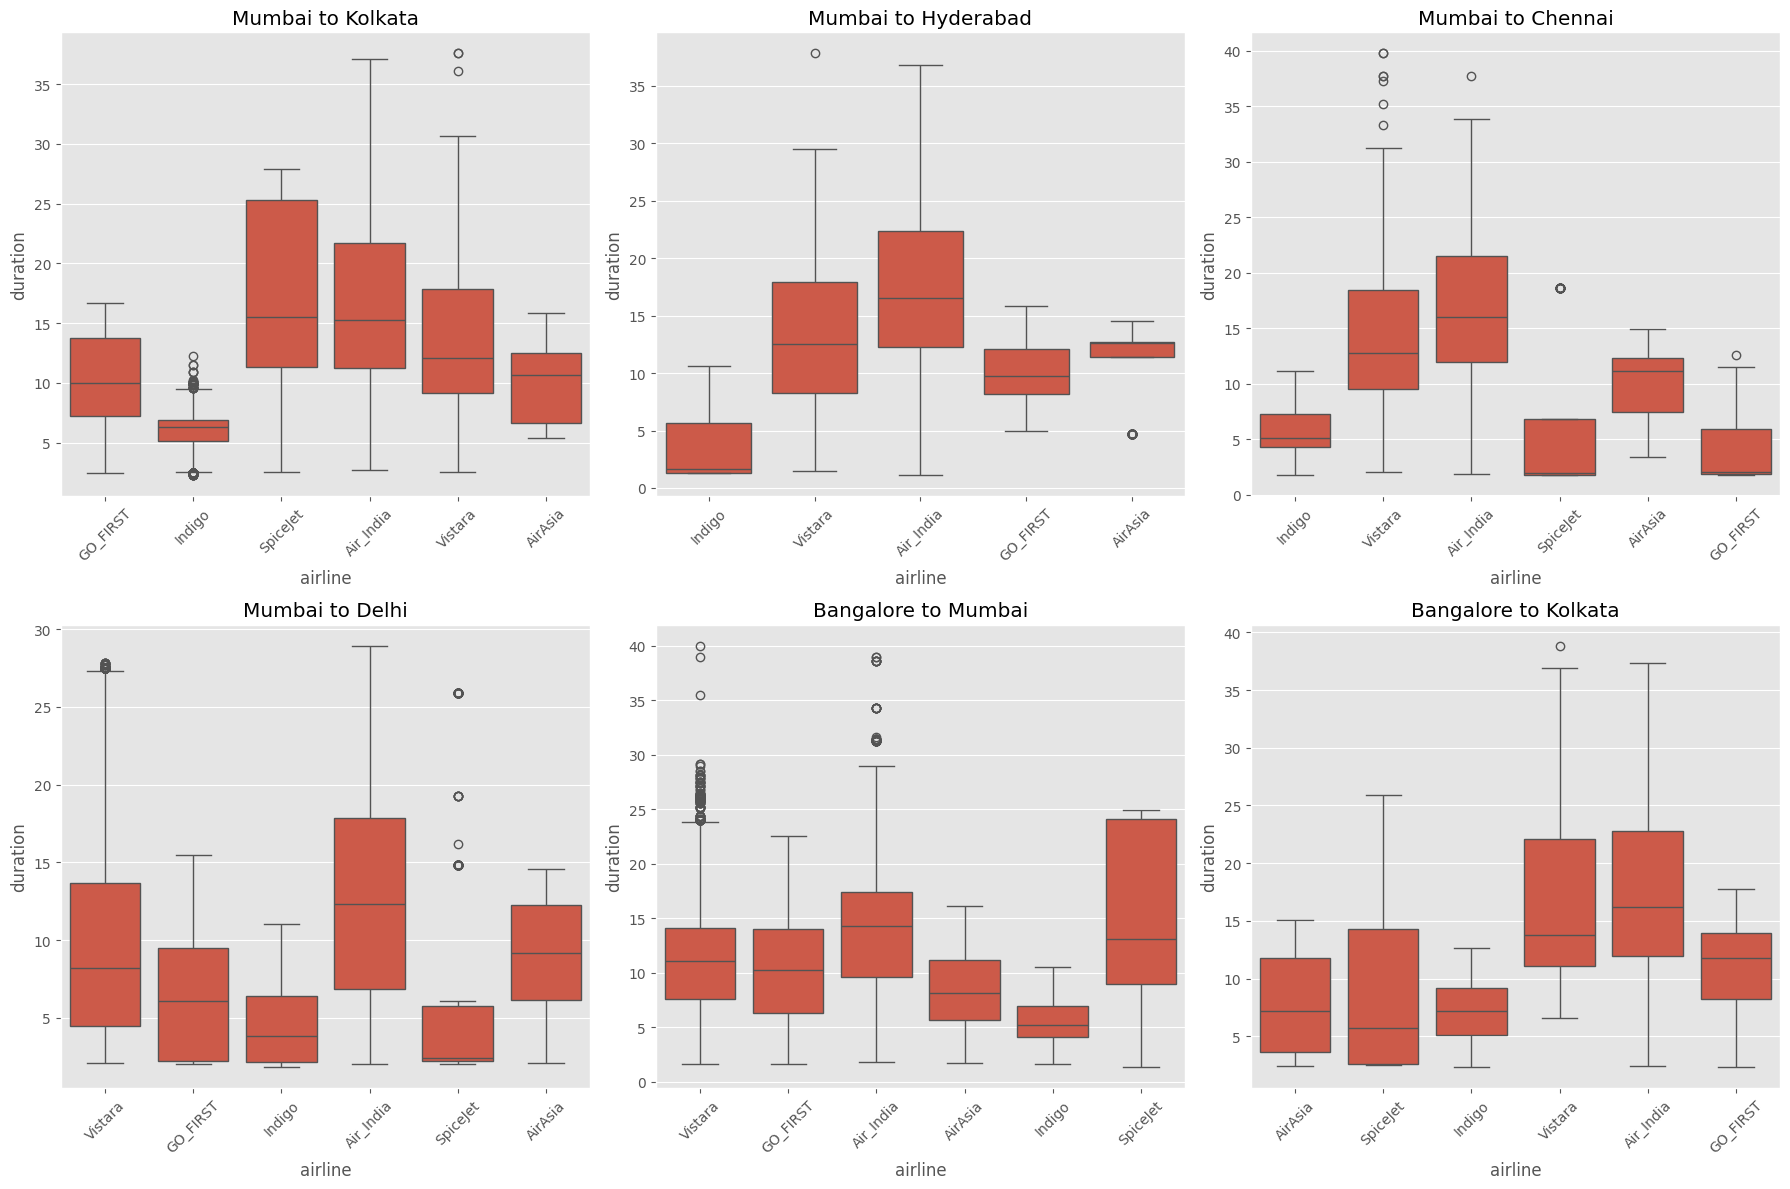

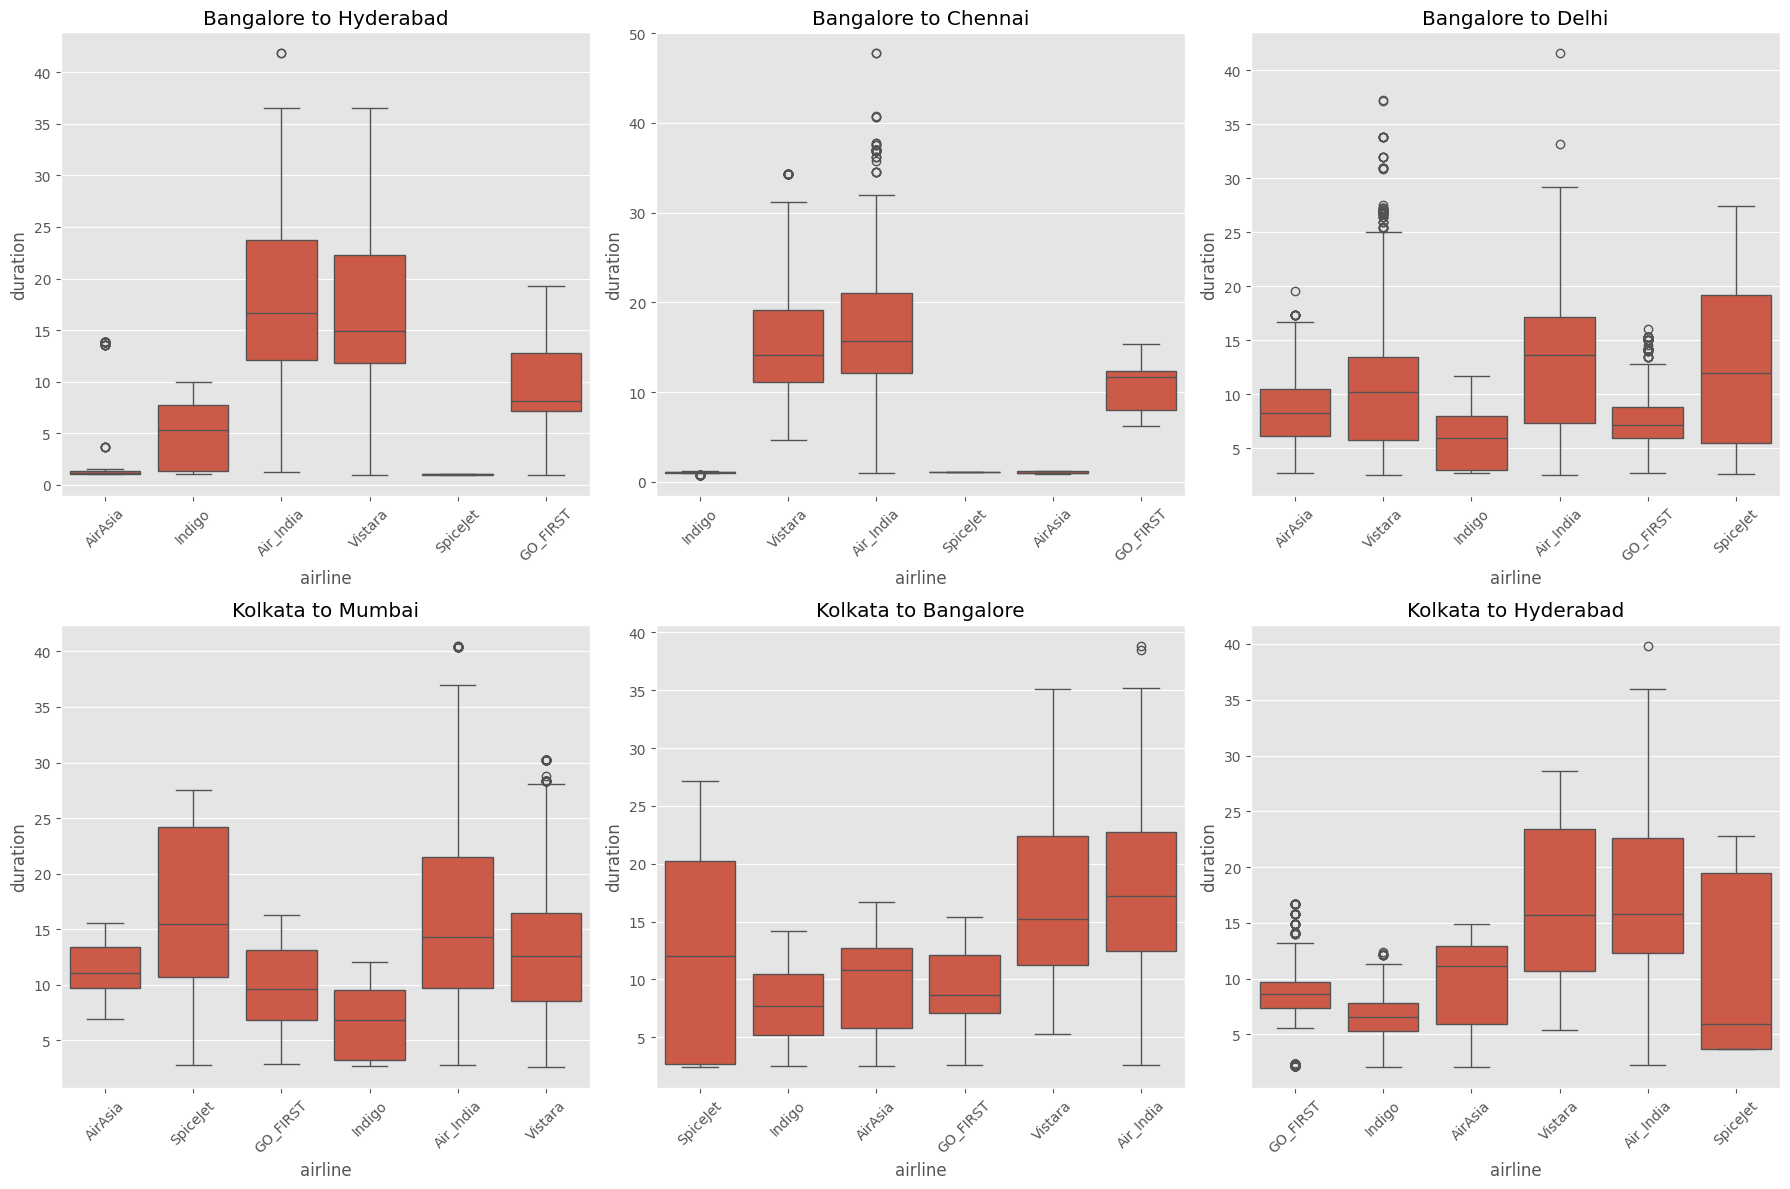

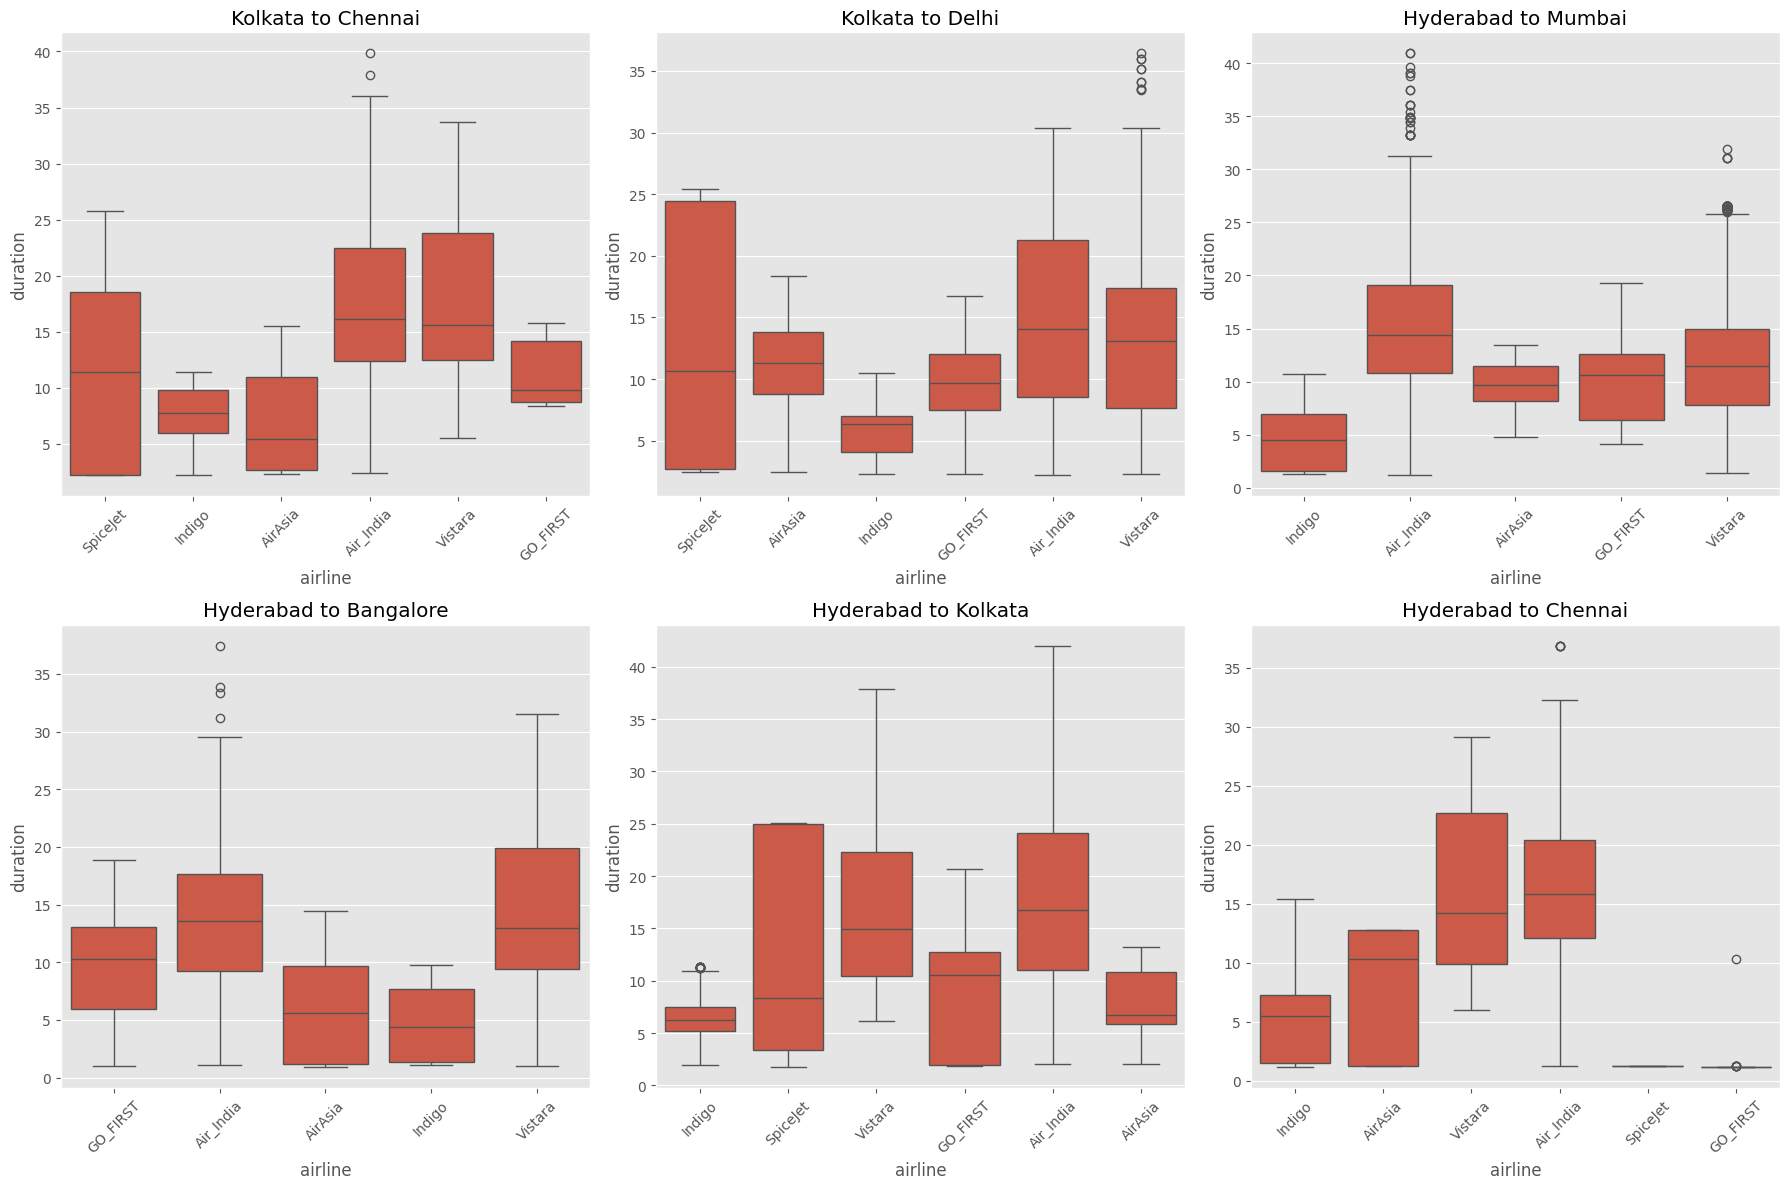

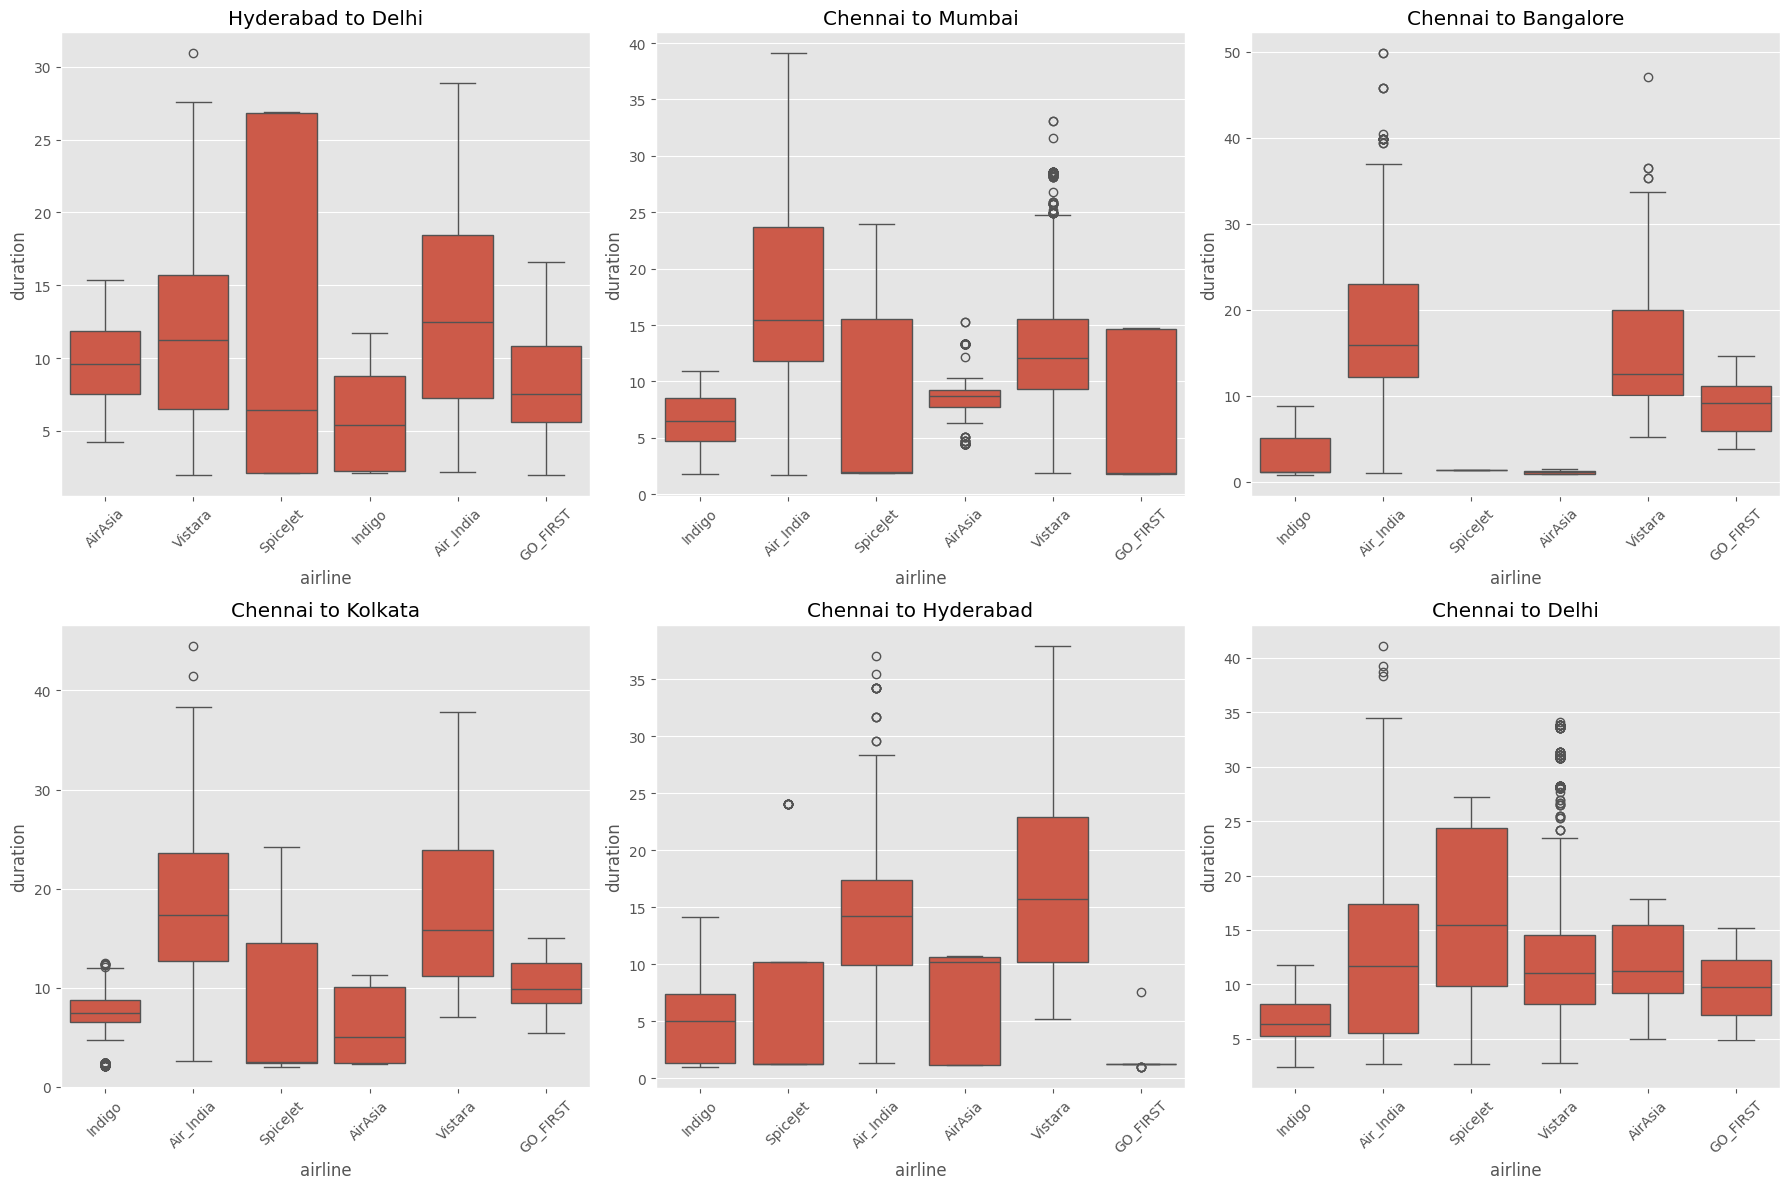

In [114]:
src = df['source_city'].unique()
dest = df['destination_city'].unique()
city_pairs = [(i, j) for i in src for j in dest if i != j]
plots_per_figure = 6
num_figures = (len(city_pairs) + plots_per_figure - 1) // plots_per_figure

for fig_num in range(num_figures):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    start_idx = fig_num * plots_per_figure
    end_idx = min((fig_num + 1) * plots_per_figure, len(city_pairs))
    current_pairs = city_pairs[start_idx:end_idx]
    
    for idx, (i, j) in enumerate(current_pairs):
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]
        temp = df[(df['source_city'] == i) & (df['destination_city'] == j)]
        sns.boxplot(data=temp, x='airline', y='duration', ax=ax)
        ax.set_title(f'{i} to {j}')
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

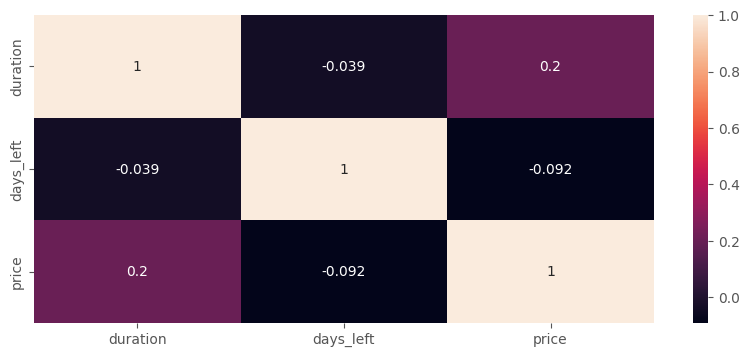

In [ ]:
plt.figure(figsize = (10,4))
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot = True)
plt.show()

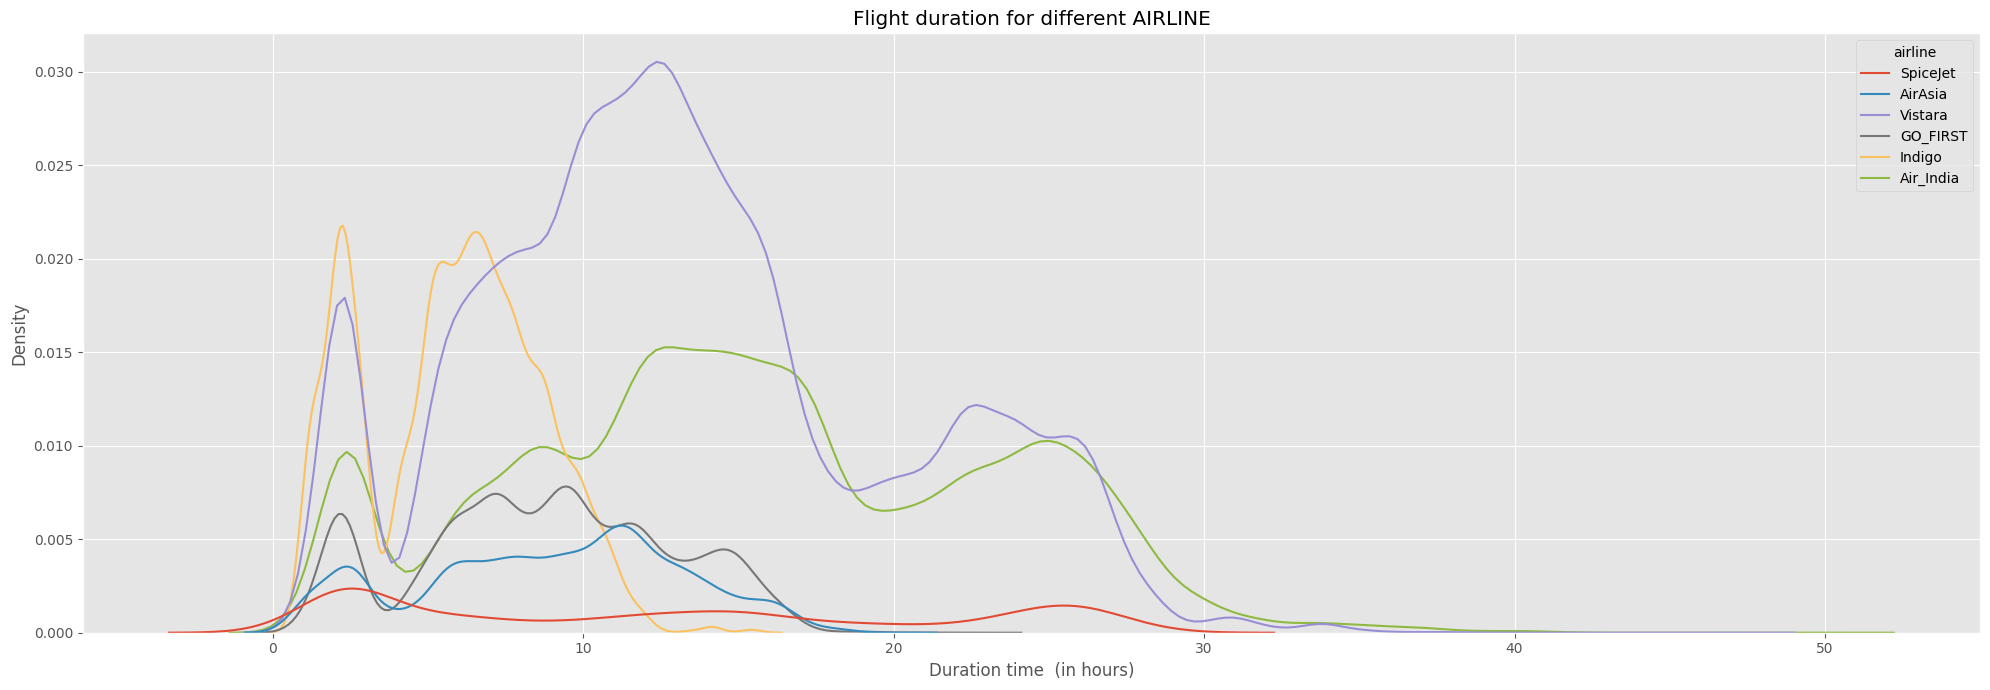

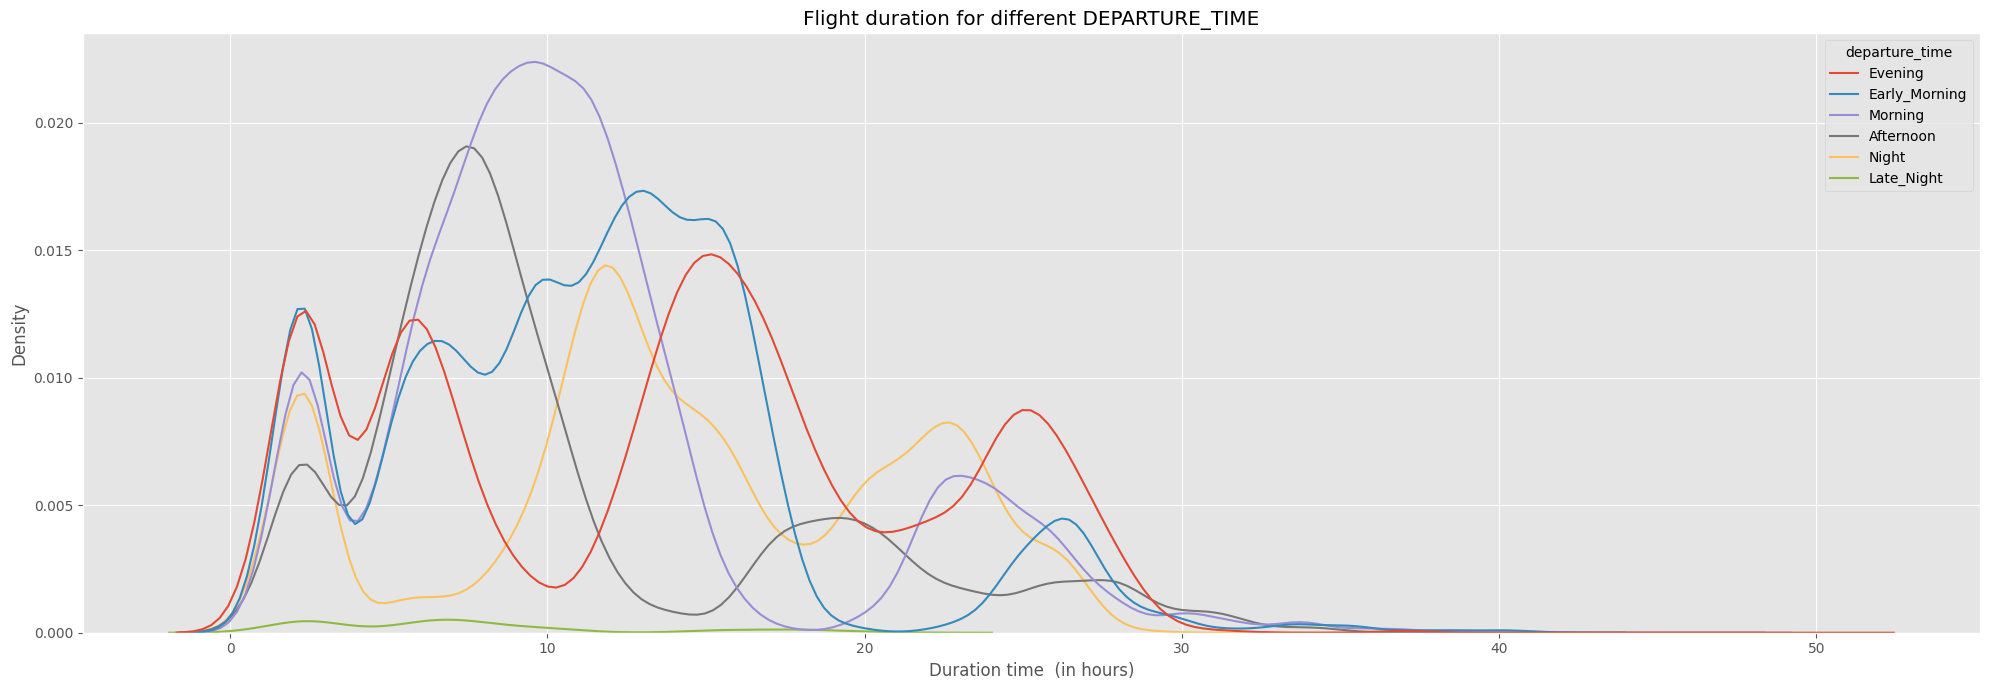

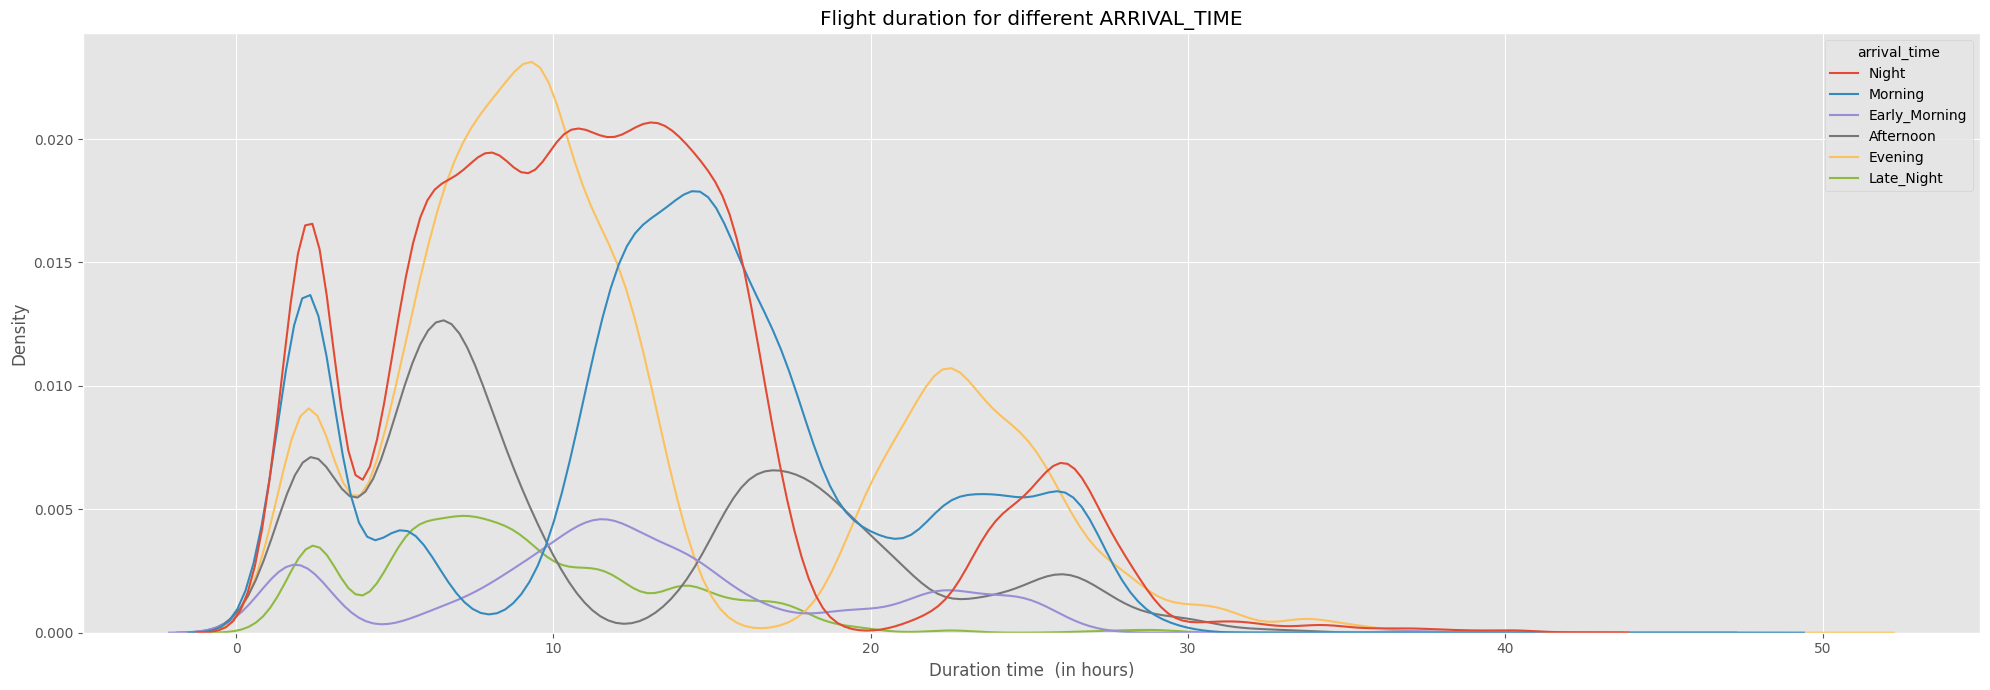

In [134]:
for i in ['airline', 'departure_time', 'arrival_time']:
    plt.figure(figsize = (20,7))
    sns.kdeplot(data = df ,  x = 'duration', hue = i)
    plt.xlabel('Duration time  (in hours)')
    plt.ylabel('Density')
    plt.title(f'Flight duration for different {i.upper()}')
    plt.tight_layout()
    plt.show()